In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
import numpy as np


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [9]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [46]:
df=pd.read_csv("KB금융 공매도_금액.csv",index_col='일자')

In [47]:
df.head(40)

,공매도 금액(전체),공매도 금액(잔고금액)
일자,,
2021-03-31,123894800,6.121135e+10
2021-03-30,304557200,5.034231e+10
2021-03-29,359094000,5.146984e+10
2021-03-26,864034900,5.020053e+10
2021-03-25,408951900,5.023190e+10
2021-03-24,29427000,4.829465e+10
2021-03-23,0,4.806892e+10
2021-03-22,103414700,4.949142e+10
2021-03-19,232320100,5.363615e+10


In [48]:
df.shape

(1166, 2)

In [13]:
df.describe()

,공매도 금액(전체),공매도 금액(잔고금액)
count,1.167000e+03,1.167000e+03
mean,3.152910e+09,6.702982e+10
std,3.477629e+09,3.355139e+10
min,0.000000e+00,2.298815e+10
25%,4.302960e+08,4.948906e+10
50%,2.210159e+09,5.776562e+10
75%,4.667607e+09,7.580078e+10
max,3.278692e+10,2.871210e+11


In [49]:
df.info

<bound method DataFrame.info of             공매도 금액(전체)  공매도 금액(잔고금액)
일자                                  
2021-03-31   123894800  6.121135e+10
2021-03-30   304557200  5.034231e+10
2021-03-29   359094000  5.146984e+10
2021-03-26   864034900  5.020053e+10
2021-03-25   408951900  5.023190e+10
...                ...           ...
2016-07-07   245343850  2.560380e+10
2016-07-06  1118667250  2.528345e+10
2016-07-05   231293100  2.663003e+10
2016-07-04   571550700  2.663003e+10
2016-07-01   307107550  2.666080e+10

[1166 rows x 2 columns]>

Text(0.5, 1.0, '공매도 금액과 잔고금액')

Text(0, 0.5, '전체 거래대금(\\)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '잔고금액(\\)')

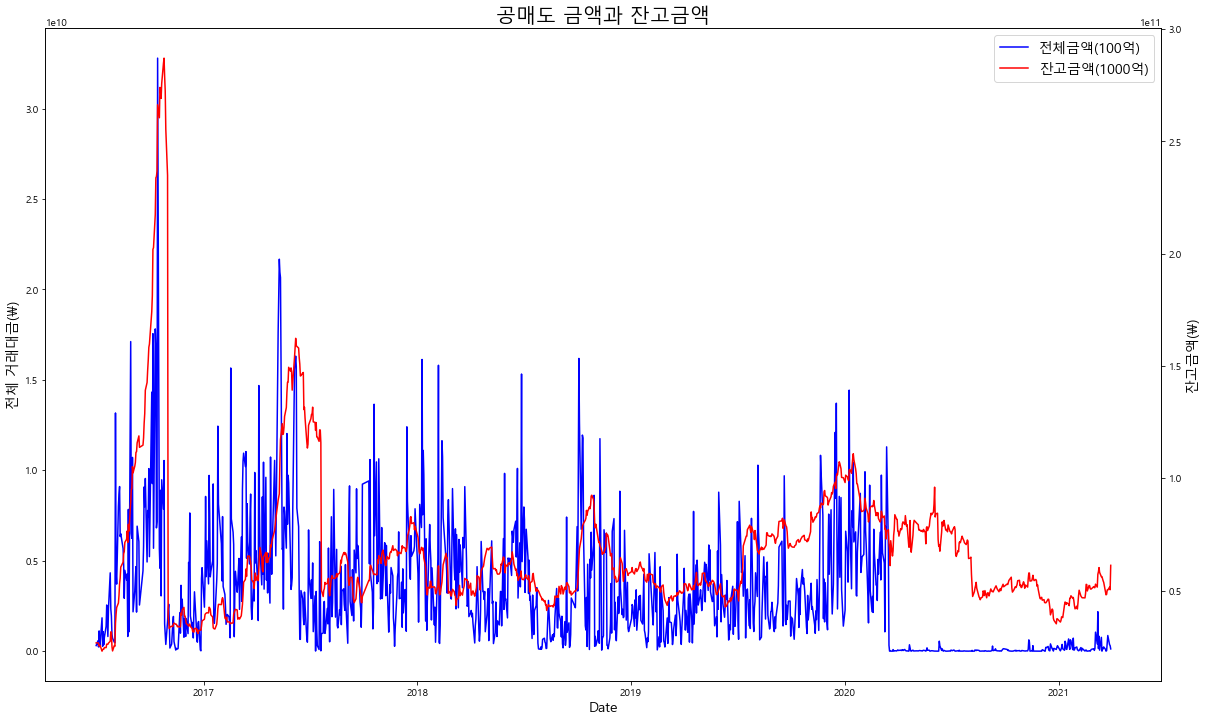

In [55]:
df.index = pd.to_datetime(df.index)

fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성
ax2 = ax.twinx()


line1=ax.plot(df['공매도 금액(전체)'], label='전체금액(100억)', color='b')
line2=ax2.plot(df['공매도 금액(잔고금액)'],label='잔고금액(1000억)', color='r')


ax.set_title('공매도 금액과 잔고금액', fontsize=20) # 타이틀 설정
ax.set_ylabel('전체 거래대금(\)', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y1축 설정
ax2.set_ylabel('잔고금액(\)', fontsize=14)   #y2축 설정



lines= line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best',fontsize=14)

plt.show()

In [70]:
fig.savefig('KB금융 공매도 금액(시각화).png')


In [71]:
df1=pd.read_csv("KB금융 공매도_수량.csv",index_col='일자')

In [72]:
df1.head()

,공매도 수량(전체),공매도 수량(잔고수량)
일자,,
2021-03-31,2221,1089170
2021-03-30,5491,916982
2021-03-29,6744,958470
2021-03-26,16247,943619
2021-03-25,7789,954979


In [73]:
df1.info


<bound method DataFrame.info of             공매도 수량(전체)  공매도 수량(잔고수량)
일자                                  
2021-03-31        2221       1089170
2021-03-30        5491        916982
2021-03-29        6744        958470
2021-03-26       16247        943619
2021-03-25        7789        954979
...                ...           ...
2016-07-06       35004        793829
2016-07-05        7096        816872
2016-07-04       17494        816872
2016-07-01        9360        811592
2016-06-30       59732        786925

[1167 rows x 2 columns]>

In [74]:
df1.describe()

,공매도 수량(전체),공매도 수량(잔고수량)
count,1167.000000,1.167000e+03
mean,65242.110540,1.475713e+06
std,74079.704928,8.302645e+05
min,0.000000,6.558010e+05
25%,8904.500000,9.866730e+05
50%,45646.000000,1.182051e+06
75%,94470.500000,1.857584e+06
max,832080.000000,6.803342e+06


Text(0.5, 1.0, '공매도 수량과 잔고수량')

Text(0, 0.5, '공매도 수량(전체)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '공매도 잔고수량')

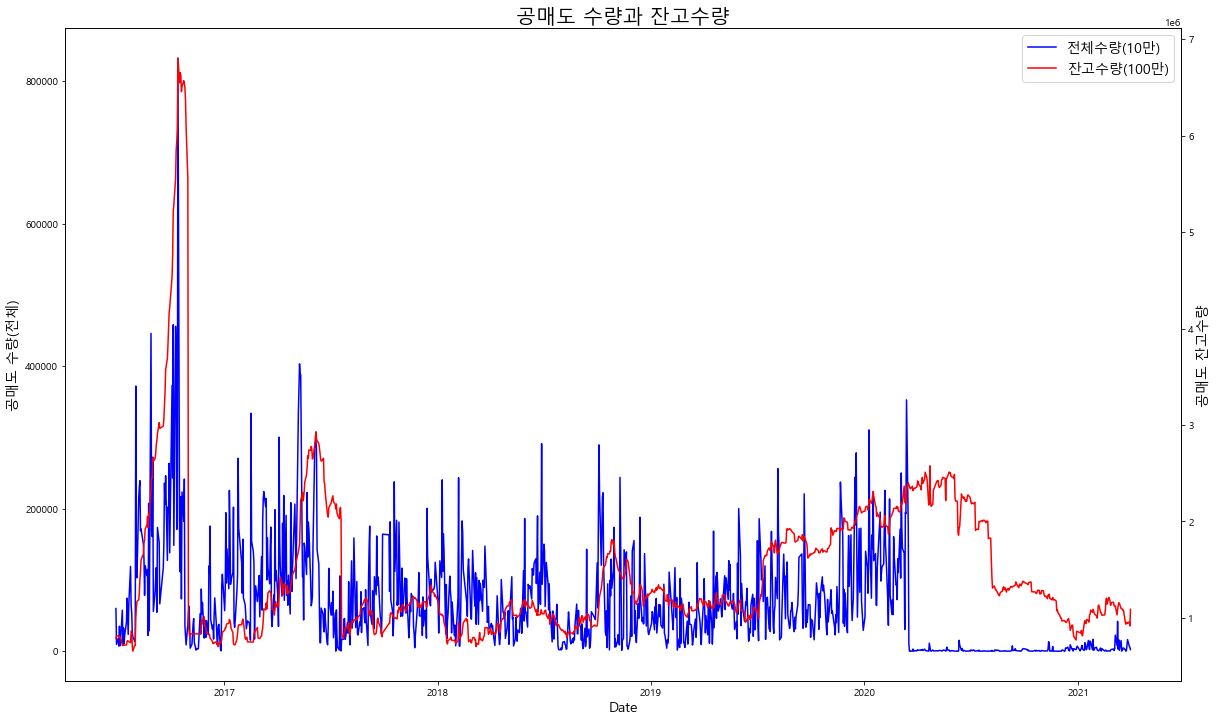

In [83]:
df1.index = pd.to_datetime(df1.index)

do = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
do1 = do.add_subplot(1,1,1) # subplot 생성
do2 = do1.twinx()


line3=do1.plot(df1['공매도 수량(전체)'], label='전체수량(10만)', color='b')
line4=do2.plot(df1['공매도 수량(잔고수량)'],label='잔고수량(100만)', color='r')


do1.set_title('공매도 수량과 잔고수량', fontsize=20) # 타이틀 설정
do1.set_ylabel('공매도 수량(전체)', fontsize=14) # x축 설정
do1.set_xlabel('Date', fontsize=14) # y1축 설정
do2.set_ylabel('공매도 잔고수량', fontsize=14)   #y2축 설정



lines= line3 + line4
labels = [l.get_label() for l in lines]
do1.legend(lines, labels, loc='best',fontsize=14)

plt.show()

In [82]:
do.savefig('KB금융 공매도 수량(시각화).png')
